In [20]:
from polygon import RESTClient
import mplfinance as mpf
import pandas as pd

client = RESTClient(api_key="6Glepk_hsdQxrNhR6jQuWy9gUAfjc4YU")

In [18]:
ticker = "AAPL"
start = "2019-01-01"
end = "2019-02-01"
resp = client.list_aggs(ticker=ticker, multiplier=1, timespan="minute", from_=start, to=end, limit=50000)
df = pd.DataFrame(resp.results)
df.index = pd.DatetimeIndex( pd.to_datetime(df['t'],unit='s') )
df.index.name = 'Timestamp'

# mpf expects a dataframe containing Open, High, Low, and Close data with a Pandas TimetimeIndex
df.columns = ['Volume', 'Volume Weighted', 'Open', 'Close', 'High', 'Low', 'Time', 'Num Items']
mpf.plot(df, type='candlestick', no_xgaps = True)

AttributeError: 'generator' object has no attribute 'results'

In [4]:
ticker = "AAPL"

# List Aggregates (Bars)
aggs = []
for a in client.list_aggs(ticker=ticker, multiplier=1, timespan="minute", from_="2025-08-01", to="2025-08-12", limit=50000):
    aggs.append(a)



In [9]:
timestamps = [a.timestamp for a in aggs]
print(timestamps)

[1754035200000, 1754035260000, 1754035320000, 1754035380000, 1754035440000, 1754035500000, 1754035560000, 1754035620000, 1754035680000, 1754035740000, 1754035800000, 1754035860000, 1754035920000, 1754035980000, 1754036040000, 1754036100000, 1754036160000, 1754036220000, 1754036340000, 1754036400000, 1754036460000, 1754036520000, 1754036580000, 1754036640000, 1754036700000, 1754036760000, 1754036820000, 1754036880000, 1754036940000, 1754037000000, 1754037060000, 1754037120000, 1754037180000, 1754037240000, 1754037300000, 1754037360000, 1754037480000, 1754037540000, 1754037600000, 1754037660000, 1754037720000, 1754037780000, 1754037840000, 1754037900000, 1754037960000, 1754038020000, 1754038080000, 1754038140000, 1754038200000, 1754038260000, 1754038320000, 1754038380000, 1754038440000, 1754038500000, 1754038560000, 1754038620000, 1754038680000, 1754038740000, 1754038800000, 1754038860000, 1754038920000, 1754038980000, 1754039040000, 1754039100000, 1754039160000, 1754039220000, 175403928

In [14]:
print(1754035200000/60000/60/24/365)

55.62009132420091


[datetime.datetime(2025, 8, 1, 3, 0), datetime.datetime(2025, 8, 1, 3, 1), datetime.datetime(2025, 8, 1, 3, 2), datetime.datetime(2025, 8, 1, 3, 3), datetime.datetime(2025, 8, 1, 3, 4), datetime.datetime(2025, 8, 1, 3, 5), datetime.datetime(2025, 8, 1, 3, 6), datetime.datetime(2025, 8, 1, 3, 7), datetime.datetime(2025, 8, 1, 3, 8), datetime.datetime(2025, 8, 1, 3, 9), datetime.datetime(2025, 8, 1, 3, 10), datetime.datetime(2025, 8, 1, 3, 11), datetime.datetime(2025, 8, 1, 3, 12), datetime.datetime(2025, 8, 1, 3, 13), datetime.datetime(2025, 8, 1, 3, 14), datetime.datetime(2025, 8, 1, 3, 15), datetime.datetime(2025, 8, 1, 3, 16), datetime.datetime(2025, 8, 1, 3, 17), datetime.datetime(2025, 8, 1, 3, 19), datetime.datetime(2025, 8, 1, 3, 20), datetime.datetime(2025, 8, 1, 3, 21), datetime.datetime(2025, 8, 1, 3, 22), datetime.datetime(2025, 8, 1, 3, 23), datetime.datetime(2025, 8, 1, 3, 24), datetime.datetime(2025, 8, 1, 3, 25), datetime.datetime(2025, 8, 1, 3, 26), datetime.datetime(202

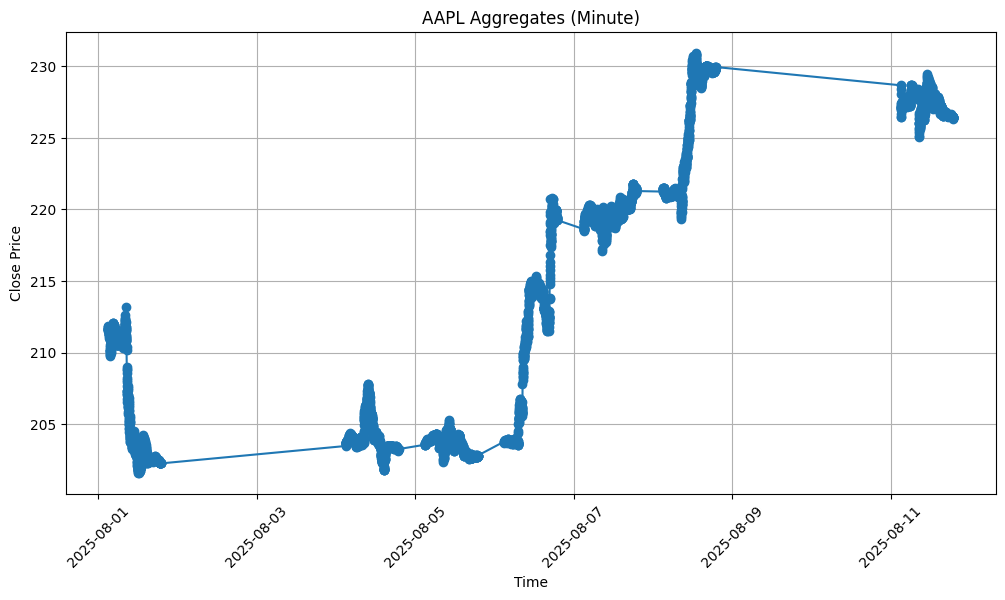

: 

In [ ]:
#Plot the aggregates
import matplotlib.pyplot as plt
from datetime import datetime

# Extract timestamps and close prices

# Convert UNIX timestamps to datetime objects
timestamps = [datetime.fromtimestamp(a.timestamp/1000) for a in aggs]
close_prices = [a.close for a in aggs]

#Unshow the weekend in plot
timestamps = [ts for ts in timestamps if ts.weekday() < 5]
print(timestamps)
close_prices = [cp for ts, cp in zip(timestamps, close_prices) if ts.weekday() < 5]

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(timestamps, close_prices, marker='o', linestyle='-')
plt.title(f"{ticker} Aggregates (Minute)")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.grid()
plt.show()
